In [43]:
import pandas as pd
df = pd.read_csv('diamonds.csv')

In [44]:
import numpy as np
from sklearn import preprocessing

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [46]:
import numpy as np

# Numerical columns
print("Numerical columns : ", list(df.select_dtypes(np.number).columns))

# Looking for categorical columns
print("\nnumber of distinct values of non-numerical columns\n",
      df.select_dtypes(exclude = np.number).nunique())

Numerical columns :  ['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

number of distinct values of non-numerical columns
 cut        5
color      7
clarity    8
dtype: int64


In [47]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [48]:
diams_dtypes = {
    'carat': np.float,
    'depth': np.float,
    'table': np.float,
    'x': np.float,
    'y': np.float,
    'z': np.float,
    'cut': "category",
    'clarity': "category",
    'color': "category",
    'price':np.int
}

data = pd.read_csv('diamonds.csv', 
                   usecols=diams_dtypes.keys(),
                   dtype=diams_dtypes
                  )

#### Ordering the categorical columns

data['clarity']=pd.Categorical(data['clarity'], 
                        categories=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
                        ordered=True)

data['cut']=pd.Categorical(data['cut'], 
                        categories=["Fair", "Good", "Very Good", "Premium", "Ideal"],
                        ordered=True)

data['color']=pd.Categorical(data['color'], 
                        categories=["J", "I", "H", "G", "F", "E", "D"],
                        ordered=True)

#### Droping outliers
data = data[(data[["x","y","z"]]> 0).all(axis=1) & (data[["x","y","z"]]< 20).all(axis=1)]


data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [36]:
del data['Unnamed: 0']

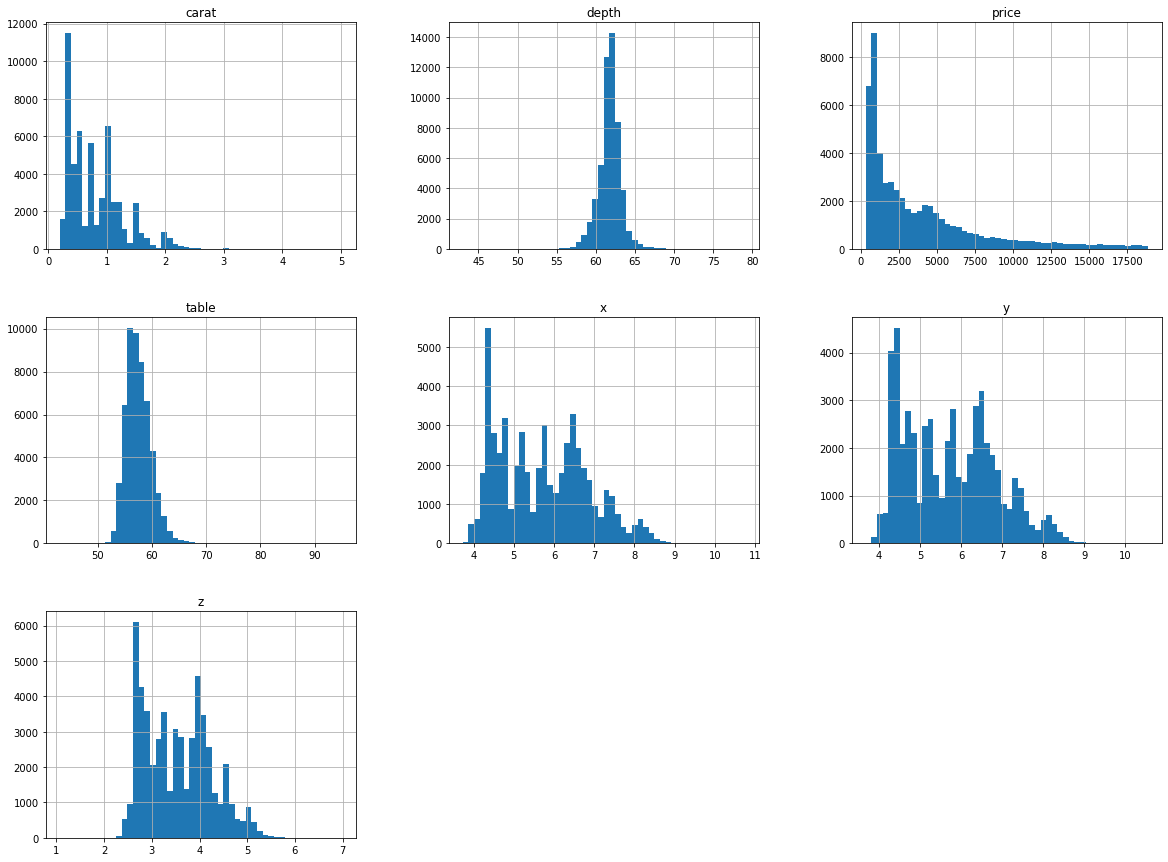

In [49]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

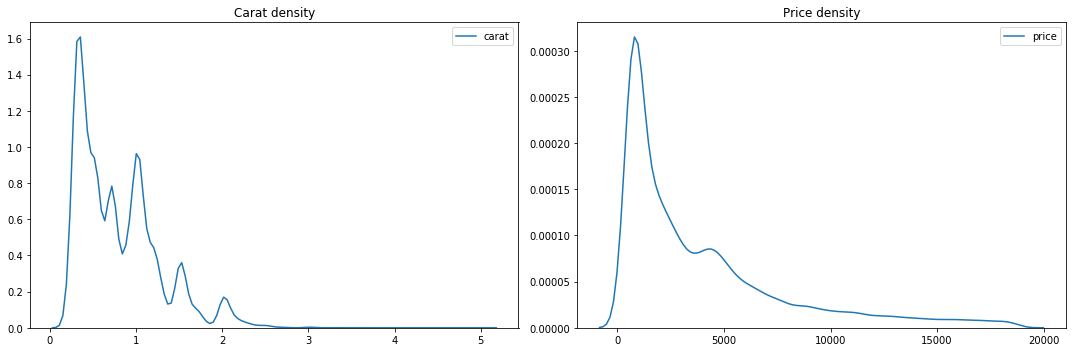

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].set_title('Carat density')
sns.kdeplot(data.carat,
            ax=axes[0]
           )

axes[1].set_title('Price density')
sns.kdeplot(data.price,
            ax=axes[1],
            )

plt.tight_layout()

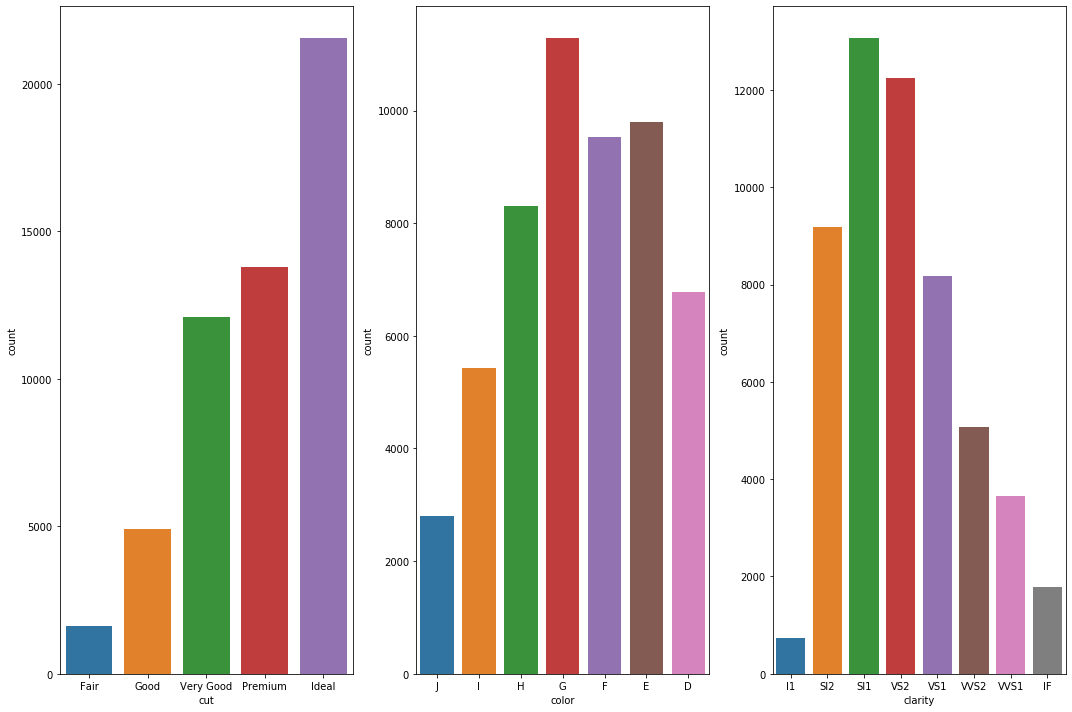

In [51]:
# Retrieving numerical columns
num_col = list(data.select_dtypes(np.number).columns)

# Retrieving categorical columns
cat_col = [col for col in data.columns if data[col].nunique() < 10]
fig, axes = plt.subplots(1,3, figsize=(15,10))

for axi, col in zip(axes.flatten(), cat_col) :
    sns.countplot(x=data[col], 
                  ax = axi
                 )

plt.tight_layout()

In [54]:
#=> log scale
for var in data.select_dtypes(include=[np.number]).columns :
        data[var] = np.log(data[var])
        


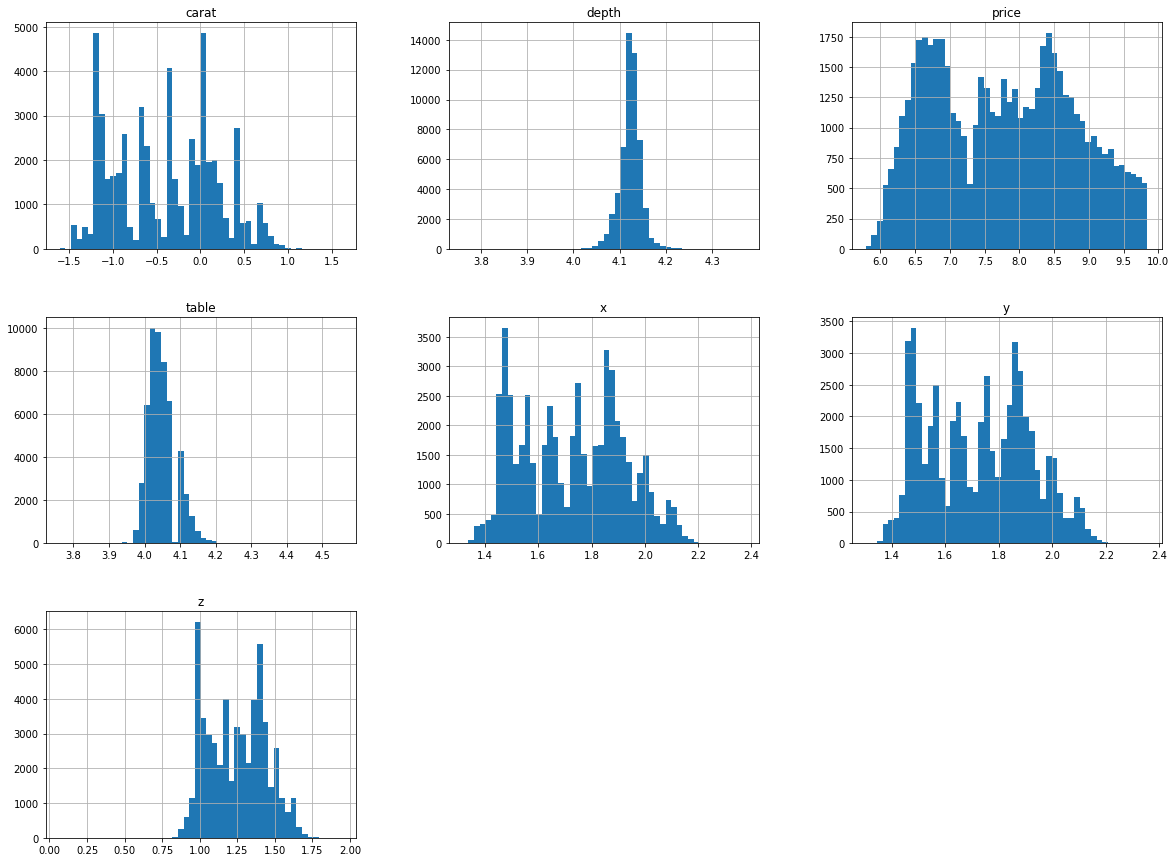

In [56]:
data.hist(bins=50,figsize=(20,15))
plt.show()

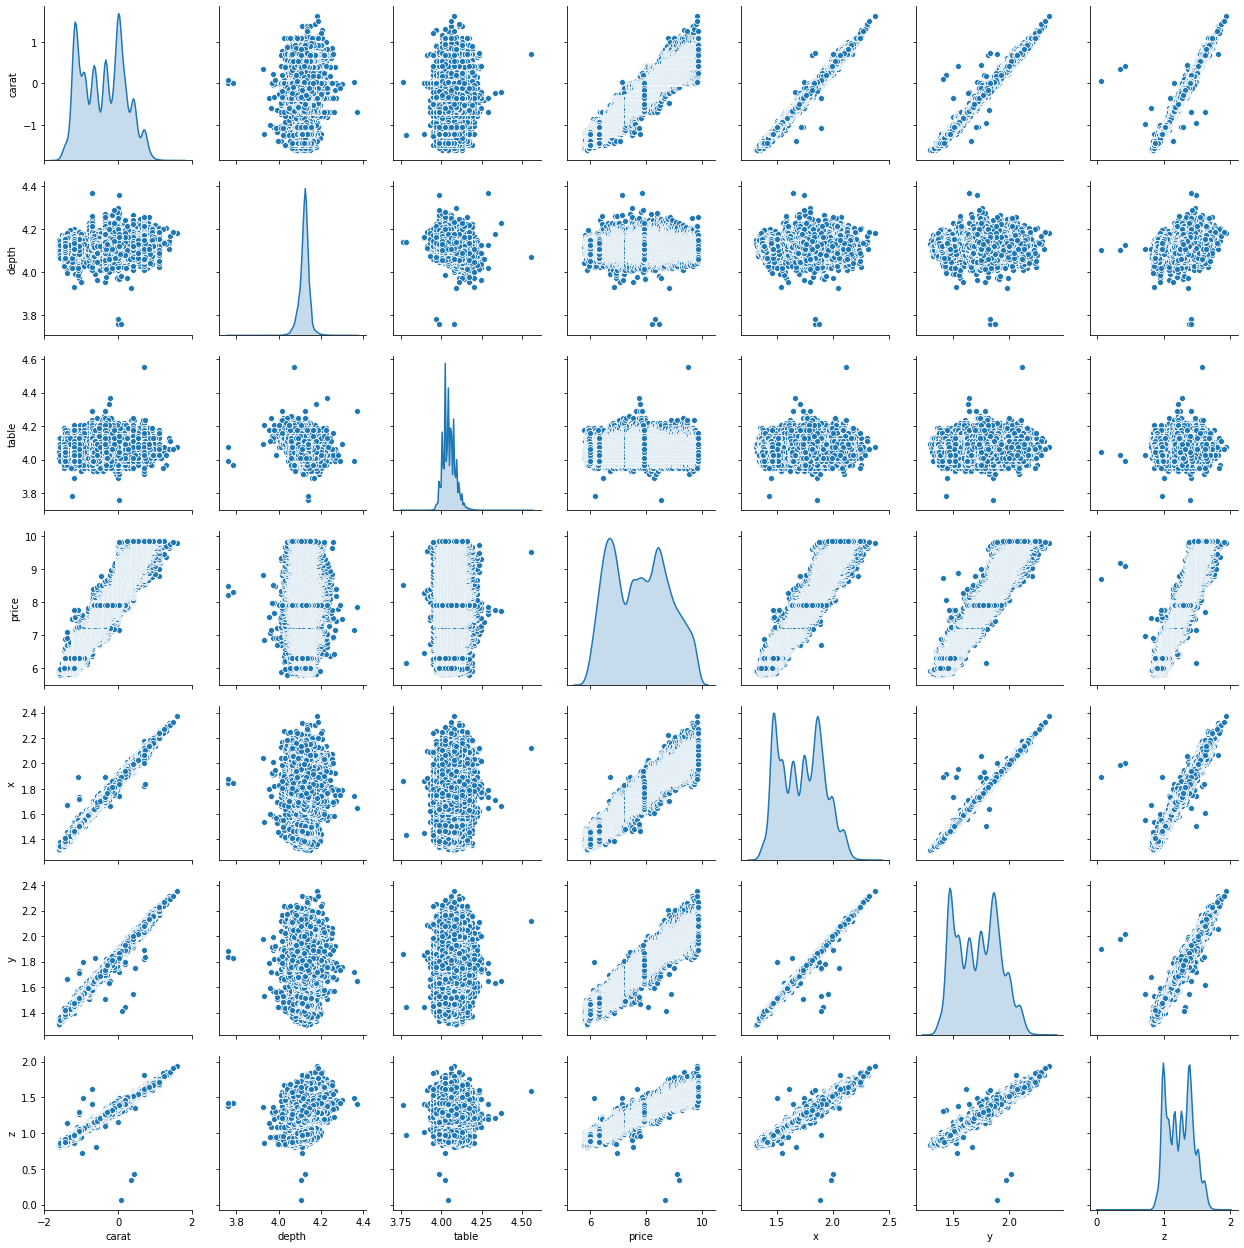

In [57]:
#much better
import seaborn as sns
sns.pairplot(data , diag_kind = 'kde');

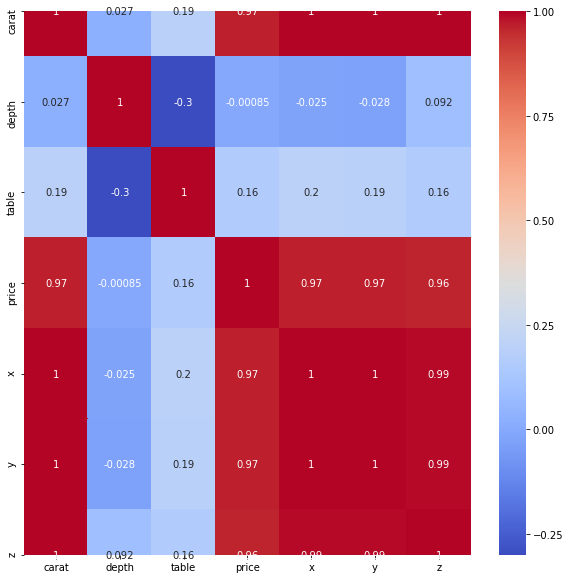

In [58]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm' );

In [59]:
#x,y,z and carat seem to have a high cor
#depth and of course unnamed and be dropped
input_cat_columns = data.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=data);

In [60]:
df_one_hot_encoding = pd.get_dummies(data)
df_one_hot_encoding.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Very Good,...,color_E,color_D,clarity_I1,clarity_SI2,clarity_SI1,clarity_VS2,clarity_VS1,clarity_VVS2,clarity_VVS1,clarity_IF
0,-1.469676,4.119037,4.007333,5.786897,1.373716,1.381282,0.887891,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-1.560648,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-1.469676,4.041295,4.174387,5.789960,1.398717,1.403643,0.837248,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,-1.237874,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.171183,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601,0,1,0,...,0,0,0,1,0,0,0,0,0,0


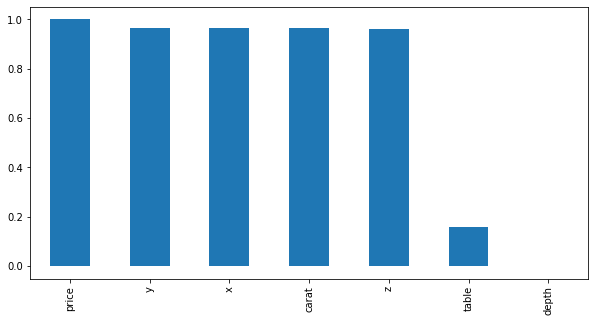

In [61]:
corr_mat = data.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

In [62]:

del df_one_hot_encoding['depth']
df_one_hot_encoding

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Very Good,cut_Premium,...,color_E,color_D,clarity_I1,clarity_SI2,clarity_SI1,clarity_VS2,clarity_VS1,clarity_VVS2,clarity_VVS1,clarity_IF
0,-1.469676,4.007333,5.786897,1.373716,1.381282,0.887891,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-1.560648,4.110874,5.786897,1.358409,1.345472,0.837248,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,-1.469676,4.174387,5.789960,1.398717,1.403643,0.837248,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,-1.237874,4.060443,5.811141,1.435085,1.442202,0.966984,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,-1.171183,4.060443,5.814131,1.467874,1.470176,1.011601,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.328504,4.043051,7.921898,1.749200,1.750937,1.252763,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
53936,-0.328504,4.007333,7.921898,1.738710,1.749200,1.283708,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
53937,-0.356675,4.094345,7.921898,1.733424,1.736951,1.269761,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
53938,-0.150823,4.060443,7.921898,1.816452,1.811562,1.319086,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [63]:
#to do remove outliers based on zscore on test data to do try label encoder

def dfboxplot(df, listvar):
    fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
    counter=0
    for ax in axes:
        df.boxplot(column=listvar[counter], ax=axes[counter])
        plt.ylabel('Price')
        plt.xlabel(listvar[counter])
        counter = counter+1
    plt.show()

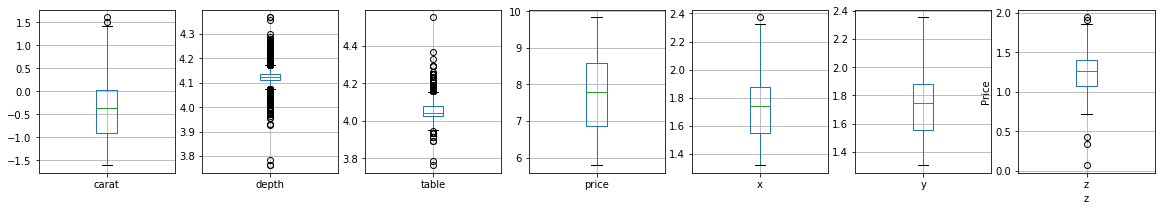

In [64]:
dfboxplot(data, data.select_dtypes(include=[np.number]).columns)

# PCA

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Scale data
scaler = StandardScaler()
scaler.fit()
sc_log_data=scaler.transform(logdata_pca)

pca = PCA(n_components=len(num_col))
pca.fit(sc_log_data)

ValueError: could not convert string to float: 'Ideal'

In [ ]:
import plotly.express as px

print("\nVariance explained by the first three PCs:",
     sum(pca.explained_variance_ratio_[:3]))


px.bar(x= range(0,len(num_col)),
       y=pca.explained_variance_ratio_,
       title = "Explained Variances of Principal Axis",
       labels={"x" : "Principal Component", "y" : "Explained Variances"}
      )

# Correlation circles

In [ ]:
X = pca.transform(sc_log_data)[:,:3]

#### Computing correlations between variables and PCs
corr_matrix = np.zeros( (sc_log_data.shape[1], X.shape[1]) )

for i,zi in enumerate(sc_log_data.T):
    for j, xj in enumerate(X.T):
        corr_matrix[i,j] =np.corrcoef(zi,xj)[0,1]

In [ ]:
from itertools import product

### function to produce iteration indexes
def iter_pairs(indexes):
    def comp(x):
        return x[0] < x[1]
    return filter(comp, product(indexes, indexes))

fig, axes = plt.subplots(1,3, figsize=(15,5), )

for i,j in iter_pairs(range(corr_matrix.shape[1])):
    
    axes[(i+j)%3].quiver(np.zeros(corr_matrix.shape[0]), np.zeros(corr_matrix.shape[0]),
               corr_matrix[:,i], corr_matrix[:,j], 
               angles='xy', scale_units='xy', scale=1,
                color='r')

    # Add labels based on feature names (here just numbers)
    feature_names = num_col
    for a,b,c in zip(corr_matrix[:,i]+0.09, corr_matrix[:,j]+0.09, num_col):
        axes[(i+j)%3].text(a, b, c, ha='center', va='center')

    # Add unit circle
    circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
    axes[(i+j)%3].add_patch( circle)


    # # Label axes
    axes[(i+j)%3].set(xlabel=f"PC{i}",ylabel=f"PC{j}")

# Done
fig = plt.gcf()
fig.suptitle("Correlation circles of variables with each factorial plan", fontsize=18)
fig.tight_layout()

In [ ]:
X= pca.transform(sc_log_data)[:,:3]
px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], 
              title="Data projection",
              labels={"x": "PC0", 
                      "y": "PC1", 
                      "z": "PC2",
                      "color":"Price"},
              color=data["price"]
             )

In [ ]:
px.scatter(x=X[:,0], y=X[:,1], 
           color=data["price"],
            title="Data projection",
            labels={"x": "PC0", 
                    "y": "PC1", 
                    "z": "PC2",
                    "color":"Price"}
          )

# Supervised methods

In [ ]:
X=df_one_hot_encoding.drop(['price'],axis=1)
Y=df_one_hot_encoding['price']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X= pca.transform(sc_log_data)[:,:3]
px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], 
              title="Data projection",
              labels={"x": "PC0", 
                      "y": "PC1", 
                      "z": "PC2",
                      "color":"Price"},
              color=data["price"]
             )

In [41]:
X=df_one_hot_encoding.drop(['price'],axis=1)
Y=df_one_hot_encoding['price']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
X

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.000000,-1.469676,Ideal,E,SI2,4.119037,4.007333,5.786897,1.373716,1.381282,0.887891
1,0.693147,-1.560648,Premium,E,SI1,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248
2,1.098612,-1.469676,Good,E,VS1,4.041295,4.174387,5.789960,1.398717,1.403643,0.837248
3,1.386294,-1.237874,Premium,I,VS2,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984
4,1.609438,-1.171183,Good,J,SI2,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601
...,...,...,...,...,...,...,...,...,...,...,...
53935,10.895553,-0.328504,Ideal,D,SI1,4.107590,4.043051,7.921898,1.749200,1.750937,1.252763
53936,10.895572,-0.328504,Good,D,SI1,4.144721,4.007333,7.921898,1.738710,1.749200,1.283708
53937,10.895591,-0.356675,Very Good,D,SI1,4.139955,4.094345,7.921898,1.733424,1.736951,1.269761
53938,10.895609,-0.150823,Premium,H,SI2,4.110874,4.060443,7.921898,1.816452,1.811562,1.319086


Rsquare: 0.983050
MAE_test: 404.7651994449176
MSE_test: 629006.4657764562
RMSE_test 793.0992786382145

MAE_train: 404.7651994449176
MSE_train: 629006.4657764562
RMSE_train 793.0992786382145


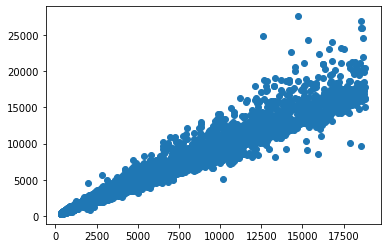

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg_all = LinearRegression()
reg_all.fit(X_train,Y_train) 
y_pred=reg_all.predict(X_test)
plt.scatter(np.exp(Y_test),np.exp(y_pred))

Rsquare=reg_all.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))


print('MAE_test:', metrics.mean_absolute_error(np.exp(Y_test), np.exp(y_pred)))
print('MSE_test:', metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred)))
print('RMSE_test', np.sqrt(metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred))))
print('')
y_pred_train=reg_all.predict(X_train)
print('MAE_train:', metrics.mean_absolute_error(np.exp(Y_train), np.exp(y_pred_train)))
print('MSE_train:', metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train)))
print('RMSE_train', np.sqrt(metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train))))

Rsquare: 0.982328
Rsquare: 0.982328
MAE_test: 346.0936456964838
MSE_test: 617707.8048753276
RMSE_test 785.9438942286705

MAE_train: 346.0936456964838
MSE_train: 617707.8048753276
MSE_train_exp: 471315.71946125093
RMSE_train 785.9438942286705


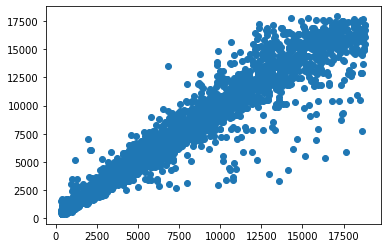

In [21]:
from sklearn.neighbors import KNeighborsRegressor
reg_all = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)
reg_all.fit(X_train,Y_train)
y_pred=reg_all.predict(X_test)
plt.scatter(np.exp(Y_test),np.exp(y_pred))
Rsquare=reg_all.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))

Rsquare=reg_all.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))


print('MAE_test:', metrics.mean_absolute_error(np.exp(Y_test), np.exp(y_pred)))
print('MSE_test:', metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred)))
print('RMSE_test', np.sqrt(metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred))))
print('')
y_pred_train=reg_all.predict(X_train)
print('MAE_train:', metrics.mean_absolute_error(np.exp(Y_train), np.exp(y_pred_train)))
print('MSE_train:', metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train)))
print('RMSE_train', np.sqrt(metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train))))

In [22]:
import math
math.pow(471315, 0.5)

686.5238524625346

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Rsquare: 0.987535
MAE_test: 337.4603129289949
MSE_test: 414535.7619054826
RMSE_test 643.8445168714902

MAE_train: 337.4603129289949
MSE_train: 414535.7619054826
RMSE_train 643.8445168714902


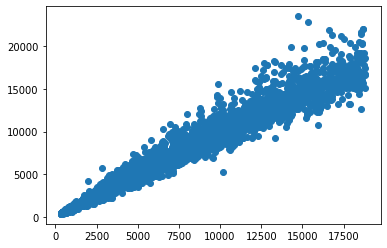

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,Y_train)
y_pred = regressor.predict(X_test)
plt.scatter(np.exp(Y_test),np.exp(y_pred))
Rsquare=regressor.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))

print('MAE_test:', metrics.mean_absolute_error(np.exp(Y_test), np.exp(y_pred)))
print('MSE_test:', metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred)))
print('RMSE_test', np.sqrt(metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred))))
print('')
y_pred_train = regressor.predict(X_train)
print('MAE_train:', metrics.mean_absolute_error(np.exp(Y_train), np.exp(y_pred_train)))
print('MSE_train:', metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train)))
print('RMSE_train', np.sqrt(metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train))))

Rsquare: 0.990986
MAE_test: 281.3085928665022
MSE_test: 320715.15558223164
RMSE_test 566.3171863737067

MAE_train: 281.3085928665022
MSE_train: 320715.15558223164
RMSE_train 566.3171863737067


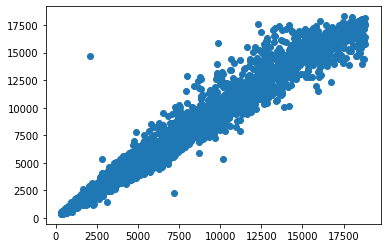

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

plt.scatter(np.exp(Y_test),np.exp(y_pred))
Rsquare=rf.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))


print('MAE_test:', metrics.mean_absolute_error(np.exp(Y_test), np.exp(y_pred)))
print('MSE_test:', metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred)))
print('RMSE_test', np.sqrt(metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred))))
print('')
y_pred_train=rf.predict(X_train)
print('MAE_train:', metrics.mean_absolute_error(np.exp(Y_train), np.exp(y_pred_train)))
print('MSE_train:', metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train)))
print('RMSE_train', np.sqrt(metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train))))

Rsquare: 0.968263
MAE_test: 351.0639740390852
MSE_test: 499254.1089555164
RMSE_test 706.5791597234639

MAE_train: 351.0639740390852
MSE_train: 499254.1089555164
RMSE_train 706.5791597234639


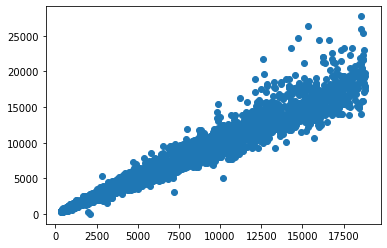

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


reg_all = linear_model.LinearRegression()
reg_all.fit(X_train_poly,Y_train)
y_pred=reg_all.predict(X_test_poly)

plt.scatter(np.exp(Y_test),np.exp(y_pred))

Rsquare=reg_all.score(X_test_poly,Y_test)
print("Rsquare: %f" %(Rsquare))


print('MAE_test:', metrics.mean_absolute_error(np.exp(Y_test), np.exp(y_pred)))
print('MSE_test:', metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred)))
print('RMSE_test', np.sqrt(metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred))))
print('')
y_pred_train=reg_all.predict(X_train_poly)
print('MAE_train:', metrics.mean_absolute_error(np.exp(Y_train), np.exp(y_pred_train)))
print('MSE_train:', metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train)))
print('RMSE_train', np.sqrt(metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train))))

Rsquare: 0.984555
MAE_test: 365.98471239352244
MSE_test: 580323.5555232054
RMSE_test 761.7897055770742

MAE_train: 365.98471239352244
MSE_train: 580323.5555232054
RMSE_train 761.7897055770742


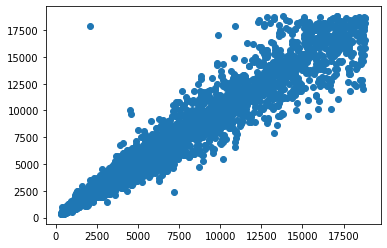

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)


plt.scatter(np.exp(Y_test),np.exp(y_pred))
Rsquare=regressor.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))



print('MAE_test:', metrics.mean_absolute_error(np.exp(Y_test), np.exp(y_pred)))
print('MSE_test:', metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred)))
print('RMSE_test', np.sqrt(metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred))))
print('')
y_pred_train=regressor.predict(X_train)
print('MAE_train:', metrics.mean_absolute_error(np.exp(Y_train), np.exp(y_pred_train)))
print('MSE_train:', metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train)))
print('RMSE_train', np.sqrt(metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train))))

In [27]:
from tensorflow.keras.models import Sequential,model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(25,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','mean_squared_error'])
history = model.fit(X_train,Y_train,batch_size=64,epochs=100,verbose=2)
test=model.evaluate(X_test, Y_test, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 204,289
Trainable params: 204,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
674/674 - 2s - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_squared_error: 0.3950
Epoch 2/100
674/6

Epoch 73/100
674/674 - 2s - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_squared_error: 0.0130
Epoch 74/100
674/674 - 2s - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_squared_error: 0.0132
Epoch 75/100
674/674 - 2s - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_squared_error: 0.0129
Epoch 76/100
674/674 - 2s - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_squared_error: 0.0133
Epoch 77/100
674/674 - 2s - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_squared_error: 0.0133
Epoch 78/100
674/674 - 2s - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_squared_error: 0.0128
Epoch 79/100
674/674 - 2s - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_squared_error: 0.0129
Epoch 80/100
674/674 - 2s - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_squared_error: 0.0129
Epoch 81/100
674/674 - 2s - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_squared_error: 0.0130
Epoch 82/100
674/674 - 2s - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_squared_error: 0.0133


In [28]:
y_pred = model.predict(X_test)
print('MAE_train:', metrics.mean_absolute_error(np.exp(Y_test), np.exp(y_pred)))
print('MSE_train:', metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred)))
print('RMSE_train', np.sqrt(metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred))))

MAE_train: 379.0547071026765
MSE_train: 520009.51319835783
RMSE_train 721.1168512788742


In [29]:
data = {'Algo':  ['Linear regression', 'KNeighborsRegressor', 'SVM', 'Random forest', 'Polynomial reg', 'decision tree', 'deep learning'],
        'MAE': ['404.765', '346.094', '337.460', '282.4867', '351.064', '365.985', '332.473'],
        'RMSE' : ['793.099', '785.9439', '643.845', '562.877', '706.579', '761.790', '668.357']
        }

df = pd.DataFrame (data)
df




,Algo,MAE,RMSE
0,Linear regression,404.765,793.099
1,KNeighborsRegressor,346.094,785.9439
2,SVM,337.460,643.845
3,Random forest,282.4867,562.877
4,Polynomial reg,351.064,706.579
5,decision tree,365.985,761.790
6,deep learning,332.473,668.357


In [50]:
y_pred

array([7.50549227, 9.09694768, 9.40779682, ..., 9.40992866, 6.24804287,
       7.70300768])

In [70]:
from sklearn.ensemble import RandomForestRegressor
nb_estimators_list = range(1,45)
list_mae = []
list_rmse = []
list_mae_train = []
list_rmse_train = []
for i in nb_estimators_list:
    rf = RandomForestRegressor(n_estimators = i)
    rf.fit(X_train,Y_train)
    y_pred = rf.predict(X_test)
    list_mae.append(metrics.mean_absolute_error(np.exp(Y_test), np.exp(y_pred)))
    list_rmse.append(np.sqrt(metrics.mean_squared_error(np.exp(Y_test), np.exp(y_pred))))
    y_pred_train=rf.predict(X_train)
    list_mae_train.append(metrics.mean_absolute_error(np.exp(Y_train), np.exp(y_pred_train)))
    list_rmse_train.append(np.sqrt(metrics.mean_squared_error(np.exp(Y_train), np.exp(y_pred_train))))

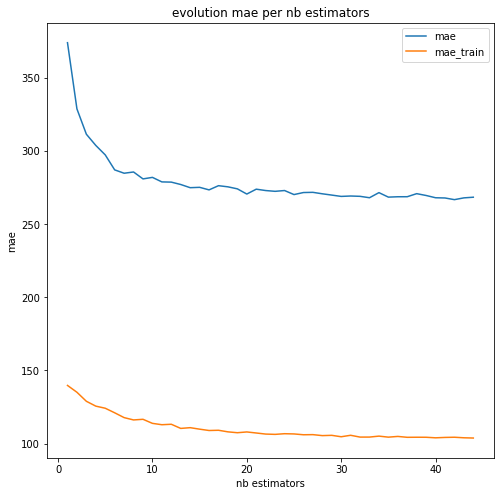

In [72]:
plt.figure(figsize=(8,8))
plt.title('evolution mae per nb estimators')
plt.plot(range(1,45), list_mae, label='mae', alpha=1)
plt.plot(range(1,45), list_mae_train, label='mae_train', alpha=1)
plt.xlabel('nb estimators')
plt.ylabel('mae')
plt.legend()

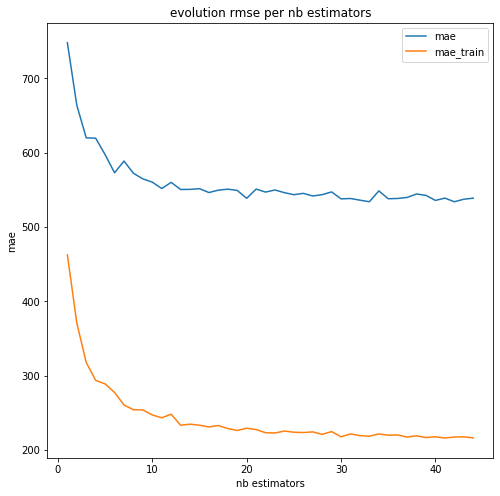

In [73]:
plt.figure(figsize=(8,8))
plt.title('evolution rmse per nb estimators')
plt.plot(range(1,45), list_rmse, label='mae', alpha=1)
plt.plot(range(1,45), list_rmse_train, label='mae_train', alpha=1)
plt.xlabel('nb estimators')
plt.ylabel('mae')
plt.legend()

In [25]:
del df['Unnamed: 0']

In [26]:
from sklearn.cluster import KMeans

def fit_algos(X, algos):
    '''
    Inputs:
        X: np array, data to fit algo on
        algos: list of algos
    Output:
        None. The algos will be fit
    '''
    for algo in algos:
        algo.fit(X)
        
        
def normalize_feats(df, feats, norm='l2'):
    '''
    Inputs:
        df: pandas dataframe
        feats: list of str #column names
    Output:
        X: 2D np array of df[feats] normalized to given norm
    '''
    XX = np.array(df.loc[:, feats])
    X_1 = (XX - XX.min(axis=0)) / (XX.max(axis=0) - XX.min(axis=0))
    return X_1

df.reset_index(inplace=True, drop=True)
X = normalize_feats(df, df.select_dtypes(include=[np.number]).columns)
nb_clusters = [i for i in range(2, 8)]
k_KMeans = [KMeans(n_clusters=i) for i in nb_clusters]
fit_algos(X, k_KMeans)
print('kmeans fit done')
X

kmeans fit done


array([[0.04339255, 0.58830808, 0.31050874, ..., 0.05418792, 0.0282622 ,
        0.24182757],
       [0.01514811, 0.5422224 , 0.44113031, ..., 0.03971468, 0.01534826,
        0.22689638],
       [0.04339255, 0.4604953 , 0.52125553, ..., 0.07782832, 0.03632631,
        0.22689638],
       ...,
       [0.38895127, 0.62269851, 0.42027779, ..., 0.39431612, 0.15652712,
        0.35441335],
       [0.45286314, 0.57488705, 0.37750935, ..., 0.47282481, 0.183434  ,
        0.36895576],
       [0.41037182, 0.60691534, 0.31050874, ..., 0.42229838, 0.16839306,
        0.36096535]])

new
new
new
new
new
new


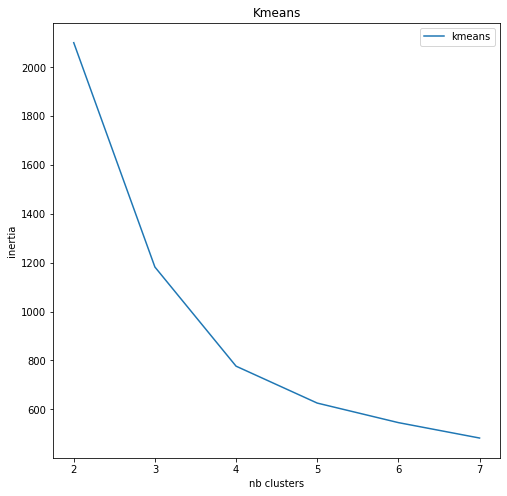

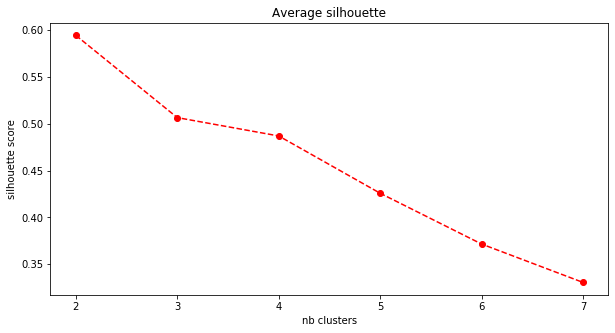

In [27]:
from sklearn.metrics import silhouette_score, silhouette_samples
inertias = []
silhouettes = []
for algo in k_KMeans:
    print('new')
#    Inertia
    inertia = algo.inertia_

    inertias.append(inertia)
    #   Silhouette
    avg_silhouette = silhouette_score(X, algo.labels_)
    silhouettes.append(avg_silhouette)

plt.figure(figsize=(8,8))
plt.title('Kmeans')
plt.plot(nb_clusters, inertias, label='kmeans', alpha=1)
plt.xlabel('nb clusters')
plt.ylabel('inertia')
plt.legend()
plt.show()

# # Average silhouette

plt.figure(figsize=(10,5))
plt.title('Average silhouette')
plt.xlabel('nb clusters')
plt.ylabel('silhouette score')
plt.plot(nb_clusters, silhouettes, marker='o', linestyle='--', color='r')
plt.show()

big run
big run
big run
big run
big run
big run
Comparing runs: 0 and 1


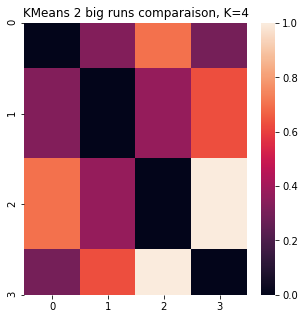

Comparing runs: 0 and 2


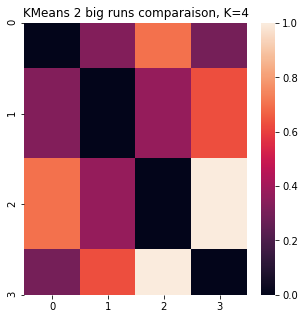

Comparing runs: 0 and 3


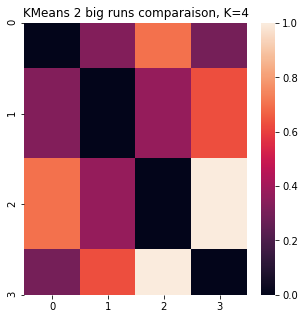

Comparing runs: 0 and 4


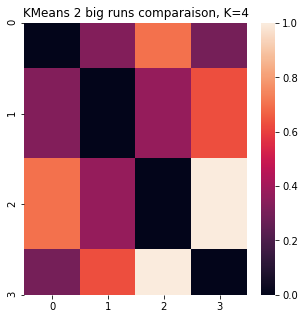

Comparing runs: 0 and 5


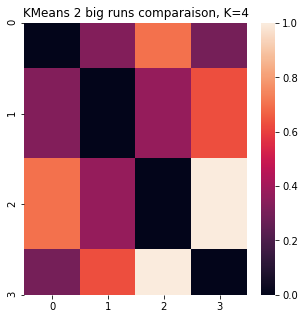

Comparing runs: 1 and 2


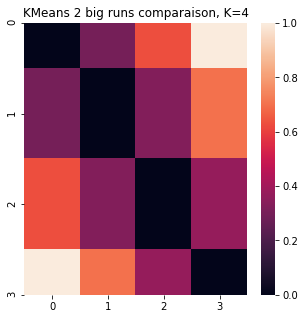

Comparing runs: 1 and 3


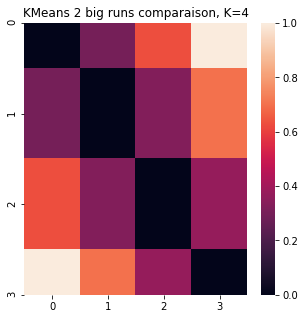

Comparing runs: 1 and 4


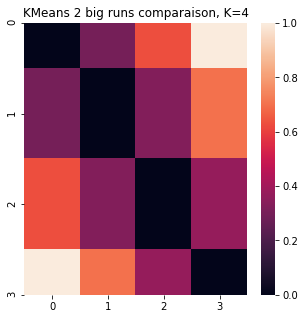

Comparing runs: 1 and 5


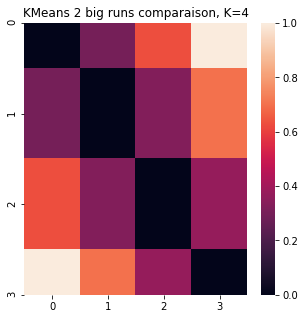

Comparing runs: 2 and 3


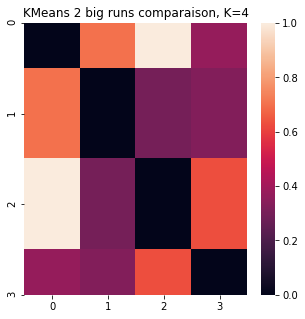

Comparing runs: 2 and 4


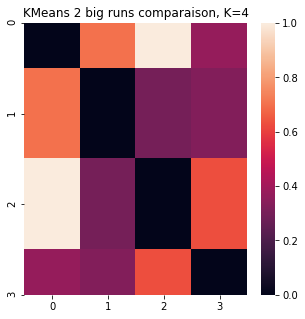

Comparing runs: 2 and 5


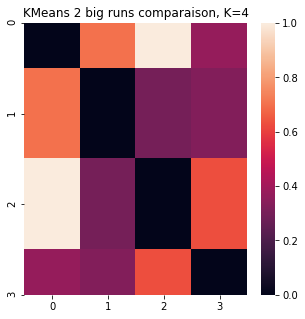

Comparing runs: 3 and 4


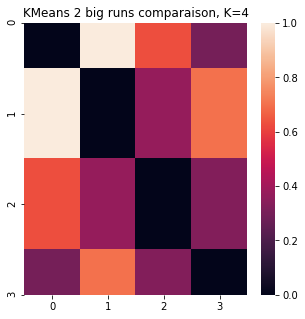

Comparing runs: 3 and 5


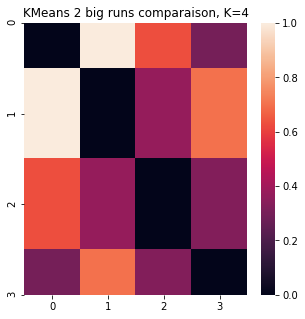

Comparing runs: 4 and 5


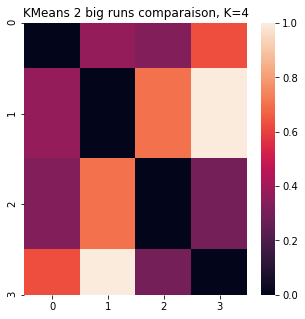

In [28]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from scipy.optimize import linear_sum_assignment
big_runs = 6
big_run_results = []
K = 4
for one_run in range(big_runs):
    print('big run')
    n_runs = 50

    K1Means = [KMeans(n_clusters=K, init='random') for i in range(n_runs)]
    K1Means[0].fit(X)
    centers0 = K1Means[0].cluster_centers_
    for idx, algo in enumerate(K1Means[1:]):
        algo.fit(X)
        centers1 = algo.cluster_centers_
        dC = euclidean_distances(centers0, centers1)
        row_i, col_i = linear_sum_assignment(dC)
        D = {}
        for i in row_i:
            D[col_i[i]] = [i]
            
        new_centers = np.zeros(shape=centers1.shape)
        for i in range(K):
            new_centers[D[i]] = centers1[i]

        centers0 = (centers0*(idx+1)+new_centers) / (idx+2)
    big_run_results += [centers0]

for idx1, run1 in enumerate(big_run_results):
    for idx2, run2 in enumerate(big_run_results):
        if idx2 > idx1:
            print('Comparing runs: {} and {}'.format(idx1, idx2))
            dC = euclidean_distances(run1, run2)
            
            row_i, col_i = linear_sum_assignment(dC)
            D = {}
            for i in row_i:
                D[col_i[i]] = [i]


            new_run2 = np.zeros(shape=run2.shape)
            for i in range(K):
                new_run2[D[i]] = run2[i]

            dC = euclidean_distances(run1, new_run2)
            plt.figure(figsize=(5,5))
            plt.title('KMeans 2 big runs comparaison, K='+str(K))
            ax = sns.heatmap(dC, linewidth=0, vmin=0, vmax=1)
            plt.show()



[[2 2 2 ... 1 0 1]
 [3 3 3 ... 2 1 2]
 [0 0 0 ... 3 1 3]
 [1 1 1 ... 2 3 2]
 [1 1 1 ... 0 2 0]
 [2 2 2 ... 1 3 1]]


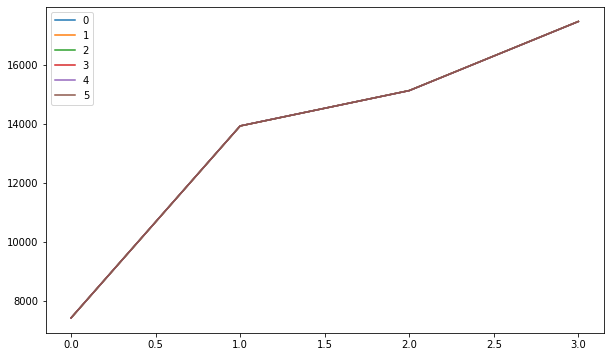

In [29]:
def my_fit(X, centers):
    '''
    Inputs:
        X: data, 2D numpy
        centers: list of np array
    description:
        returns labels of X according to the closest centroid.
    '''
    labels = []
    for i in range(X.shape[0]):
        x = X[i,:]
        Min = float('inf')
        label = -1
        for idx, center in enumerate(centers):
            d = np.linalg.norm(x-center) 
            if d < Min:
                Min = d
                label = idx
        labels.append(label)
    return labels

big_run_labels = []
for center in big_run_results:
    big_run_labels += [my_fit(X, center)]

big_run_labels = np.array(big_run_labels)
print(big_run_labels)

plt.figure(figsize=(10,6))
for idx, labels in enumerate(big_run_labels):
    XX, yy = np.unique(labels, return_counts=True)
    plt.plot(XX, sorted(yy), label=idx)
plt.legend()
plt.show()

#en absice le numero de cluster, en ordonnée le nombre de valeurs dans ce cluster pour chaque run

In [30]:
# Choosing the closest to means of all centroids

means_big_runs = big_run_results[0]
for one_big_run in big_run_results[1:]:

        dC = euclidean_distances(means_big_runs, one_big_run)

        row_i, col_i = linear_sum_assignment(dC)
        D = {}
        for i in row_i:
            D[col_i[i]] = [i]

        new_centers = np.zeros(shape=one_big_run.shape)
        for i in range(K):
            new_centers[D[i]] = one_big_run[i]

        means_big_runs = (means_big_runs*(idx+1)+new_centers) / (idx+2)
        
costs = []
for one_big_run in big_run_results:

        dC = euclidean_distances(means_big_runs, one_big_run)

        row_i, col_i = linear_sum_assignment(dC)
        
        cost = dC[row_i, col_i].sum()
        costs.append(cost)

voted = costs.index(min(costs))
voted_centers = big_run_results[voted]
voted_labels = big_run_labels[voted]
voted, costs




(0,
 [2.7657117325687973e-05,
  0.00017893244124150826,
  0.00012251064826793406,
  4.164817412657417e-05,
  2.810353881716811e-05,
  8.140958199950011e-05])

[ 9847 11598 11628 ... 27730 27731 27732]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


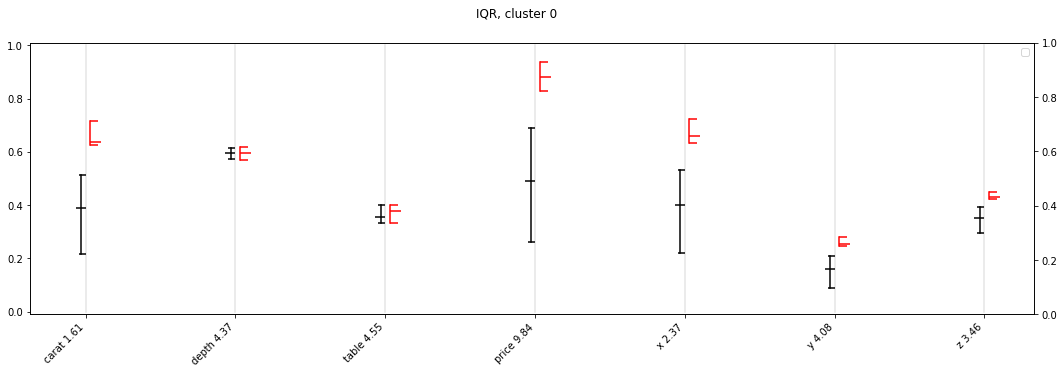

[   90    92    93 ... 53916 53917 53919]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


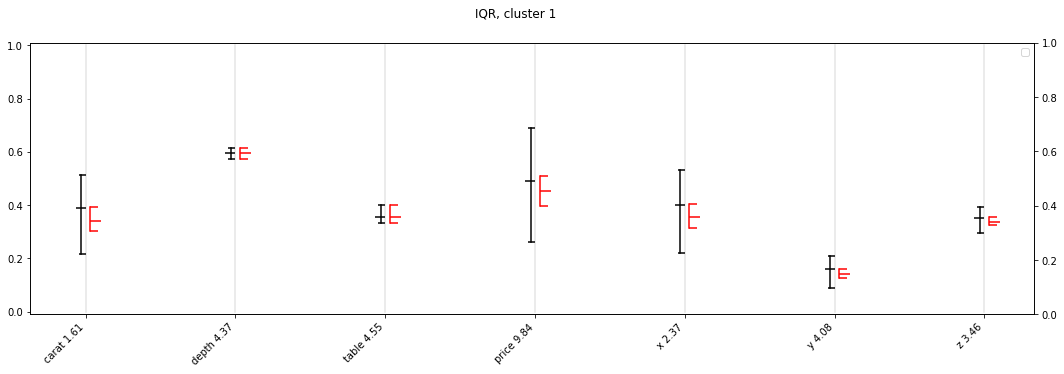

[    0     1     2 ... 53617 53618 53619]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


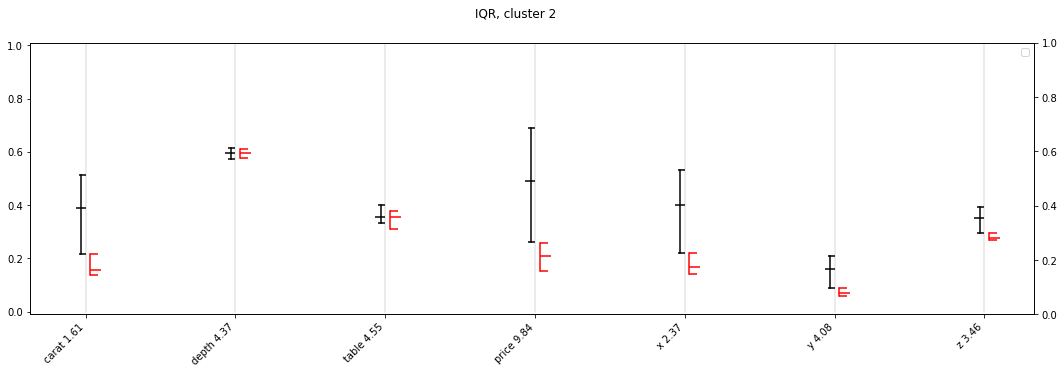

[   91    97   112 ... 53877 53897 53918]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
No handles with labels found to put in legend.


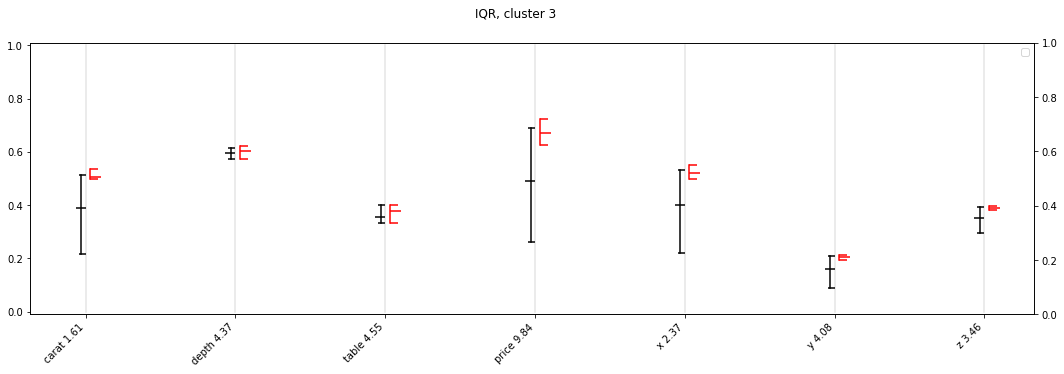

In [31]:
def cluster_summary(df, columns, labels, cluster, Qs=[0.25,0.5,0.75], show_all=True, ax1=None, color='r', flip=False, gap=0.03, scaler=None):
    """
    Inputs:
        df: pandas dataframe
        columns: list of str # features from df
        labels: list of int # labels from clustering
        cluster:int # cluster to show
        Qs: list of floats #quartile to pot
        show_all: bool # show IQR of all points, for benchmark
        color: str # color usable by pyplot
        flip: bool # flip direction of quantile bars ( respect rule:  flip=True <=> gap<0 )
        gap: float # shift for quantile plot not to overlap ( respect rule:  flip=True <=> gap<0 )
        scaler: sklearn pre-fit scaler
    """
    df_radar = df[columns]
    ### ATTENTION A L'ORDRE
    # Scaling
    x = df_radar[columns].values #returns a numpy array 
    if scaler == None:
        scaler = preprocessing.MinMaxScaler()
        scaler.fit(x)
    x_scaled = scaler.transform(x)
    df_radar = pd.DataFrame(x_scaled, columns=columns)

    # saving max of features
    max_columns = scaler.data_max_
    print(np.where(labels==cluster)[0])
    # Filtering
    idx = np.where(labels==cluster)[0]
    df_cluster = df_radar.iloc[idx,:]
    df_cluster["labels"] = cluster

    # Calculating quantiles
    l_Qs = []
    for Q in Qs:
        l_Qs += [df_cluster.groupby('labels', sort=False).quantile(q=Q)]
        if Q==0.5:
            df_05 = l_Qs[-1]
            df_05['labels'] = df_05.index


    if show_all:
        df_radar["labels"] = -1
        l_Qs_all = []
        for Q in Qs:
            l_Qs_all += [df_radar.groupby('labels', sort=False).quantile(q=Q)]
            if Q==0.5:
                df_05_all = l_Qs_all[-1]
                df_05_all['labels'] = df_05_all.index

    plot = False
    if ax1 is None:
        plot = True
        fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.set_ylim(ymin=-0.005, ymax=1.005)
    cols =columns

    x_locs = [i+gap for i in range(len(cols))]
    
    marker_side = 1
    if flip:
        marker_side = 0
    for q, df_q in zip(Qs, l_Qs):
        if q == 0.5:
            ax1.scatter(x_locs, df_q[cols], marker=marker_side, color=color, s=120, alpha=1)
        elif q in [0.25,0.75]:
            ax1.scatter(x_locs, df_q[cols], marker=marker_side, color=color, s=60, alpha=1)
        else:
            ax1.scatter(x_locs, df_q[cols], marker=marker_side, color=color, s=25, alpha=1)

    locs = ax1.get_xticks()
    labels = ax1.get_xticklabels()
        

    for idx, col in enumerate(cols):
        X = [idx +gap,idx+gap]
        Y = [l_Qs[0][col].values, l_Qs[-1][col].values]
        ax1.plot(X, Y, color=color, alpha=1, label='cluster')
        ax1.plot([idx,idx], [0,1], color='k', alpha=0.1)
        ax1.set_ylim(ymin=-0.01, ymax=1.01)

    ax1.set_xticks([i for i in range(len(cols))])
    cols_max = [col+' '+str(round(Max,2)) for col, Max in zip(cols, max_columns)]
    ax1.set_xticklabels(cols_max, ha='right', rotation=45)
    
    if show_all:
        for q, df_q in zip(Qs, l_Qs_all):
            if q == 0.5:
                ax1.scatter(cols, df_q[cols], marker=0, color='k', s=100, alpha=1)
            else:
                ax1.scatter(cols, df_q[cols], marker=0, color='k', s=50, alpha=1)

        for idx, col in enumerate(cols):
            X = [idx-gap, idx-gap]
            Y = [l_Qs_all[0][col].values, l_Qs_all[-1][col].values]
            ax1.plot(X, Y, color='k', alpha=1, label='all')
#     ax1.tick_params(labelright=True)
    ax2 = ax1.twinx()
    ax2.set_yticks([0.2*i for i in range(6)])
    if plot:
        plt.suptitle("IQR, cluster "+str(cluster))
        plt.legend()
        plt.show()
        
for i in range(K):
    cluster_summary(df, df.select_dtypes(include=[np.number]).columns, labels, i, show_all=True)
    
    
    

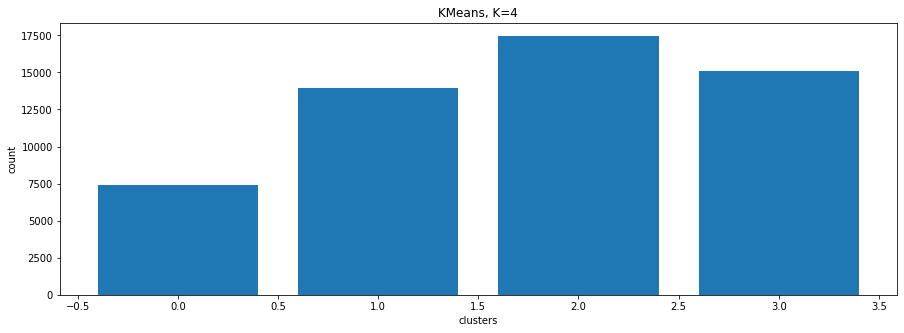

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


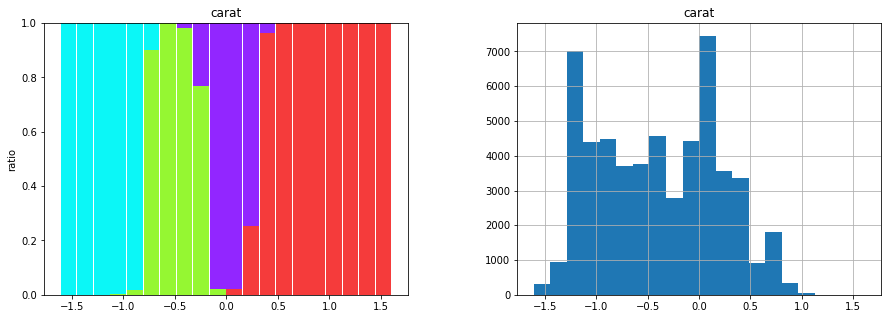

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


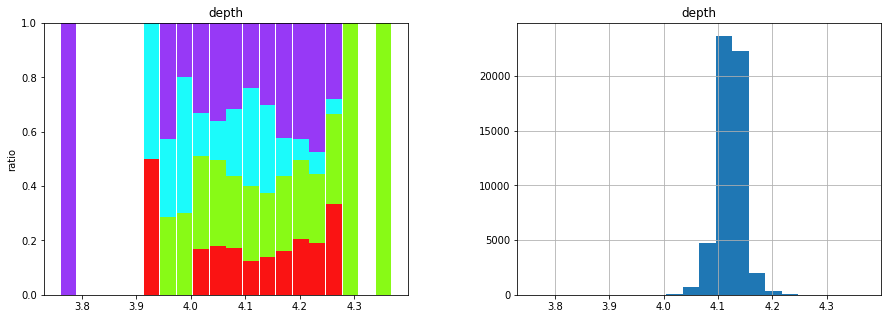

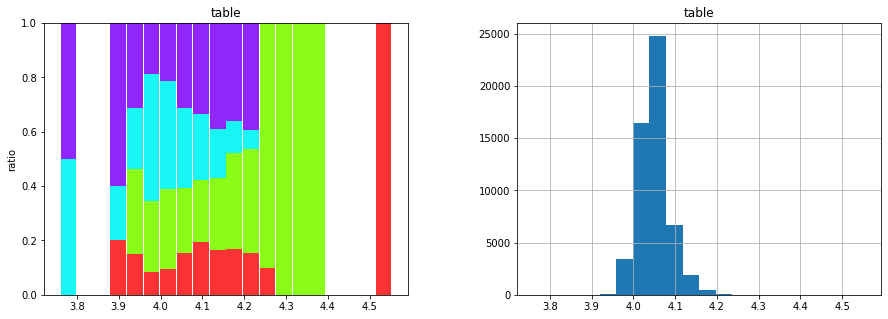

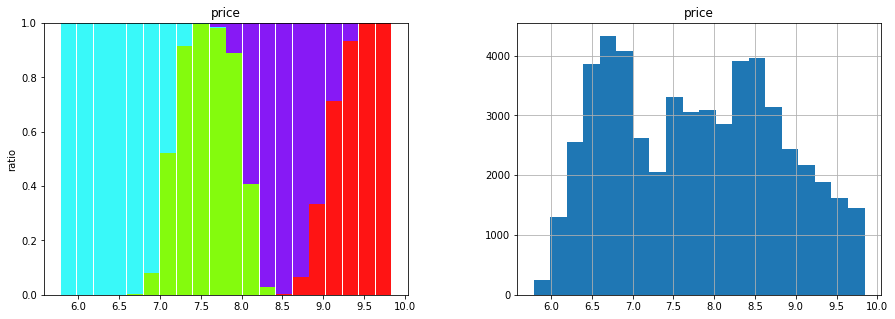

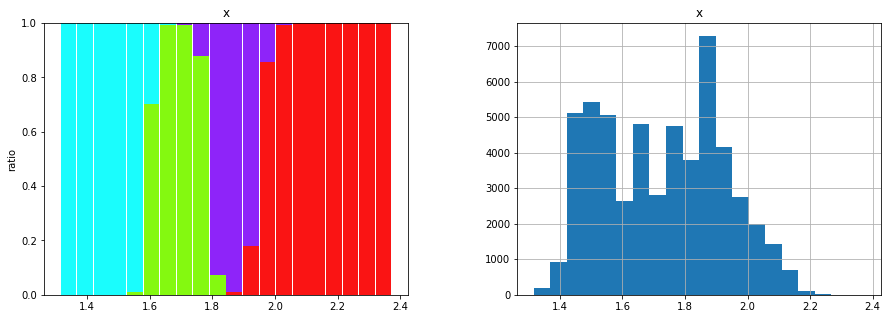

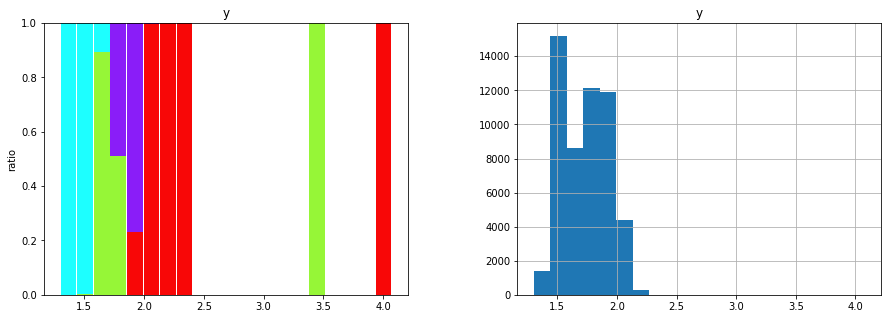

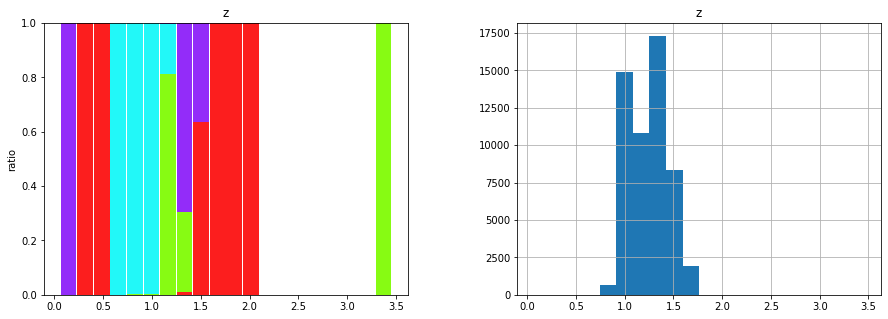

In [34]:
import colorsys
def stackedCont(metric, clusters, ax=None, title=None, n_bins=None):
    '''
    Inputs:
        metric: np array or pd series # ex: df['p2pRatio'] or np.array(df['p2pRatio'])
        clusters: np array or pd series or list # Labels attributed to elementts of metric (same indexation)
    Output:
        plots stacked histogram normalized to 1
    '''
    unique_c = np.unique(clusters)
    plot = False
    if ax==None:
        fig, ax = plt.subplots(figsize=(8,5))
        plot=True
    data = []
    legend = []
    for c in unique_c:
        legend.append(str(c))
        idx = np.where(clusters==c)[0]
        data += [metric[idx]]
    # ax.hist(data,stacked=True, normed=True, label=legend)
    n, bins, patches = ax.hist(data,stacked=True, normed=False, bins=n_bins)
    nn = [np.divide(a, n[-1]) for a in n[:-1]]
    nn += [np.subtract(np.ones(nn[0].shape), nn[-1])]
    ax.clear()
    colors =_get_colors(unique_c.size)
    width = (bins[1]-bins[0])*0.95
    ax.bar(bins[:-1], nn[0], color=colors[0], align='edge', width=width, label=0)
    for i in range(1,len(nn)):
        ax.bar(bins[:-1], nn[i], color=colors[i], bottom=nn[i-1], width=width, align='edge', label=i)
    ax.set_ylim(ymin=0, ymax=1)
    ax.set_title(title)
    ax.set_ylabel('ratio')
    if plot:
        plt.legend()
        plt.show()
    else:
        return ax
    
n_bins=20
fig, ax1 = plt.subplots(figsize=(15,5))
def _get_colors(num_colors):
    '''
    Inputs:
        num_colors: int
    Output:
        colots: list of colors usable by pyplot
    generates num_colors distinct colors for matplotlib
    Alert: Exists in 2 files: clustering.py and stacked_histograms.py
    '''
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors
def cluster_sizes(labels, give_back=False, title='cluster_sizes', ax=None):
    '''
    Inputs:
        labels: 1D np array of labels.
        give_back: bool, if True, return the cluster sizes ordered
    Output:
        Plot bar chart of cluster sizes
        if give_back, return list of int
    '''
    clusters, cluster_sizes = np.unique(labels, return_counts=True)
    plot=False
    if ax==None:
        plot=True
        fig, ax = plt.subplots()
    
    ax.set_title(title)
    ax.set_ylabel('count')
    ax.set_xlabel('clusters')
    ax.bar(clusters, cluster_sizes)
    if plot:
        plt.show()
    if give_back:
        Sizes = {}
        for c, cs in zip(clusters, cluster_sizes):
            Sizes[c]=cs
        return Sizes
    
    
cluster_sizes(labels, title='KMeans, K='+str(K), ax=ax1)
plt.show()
for cont in df.select_dtypes(include=[np.number]).columns :
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
    stackedCont(df[cont], labels, ax=ax1, title=cont, n_bins=n_bins)
    df.hist(cont, ax=ax2, bins=n_bins)
    plt.show()

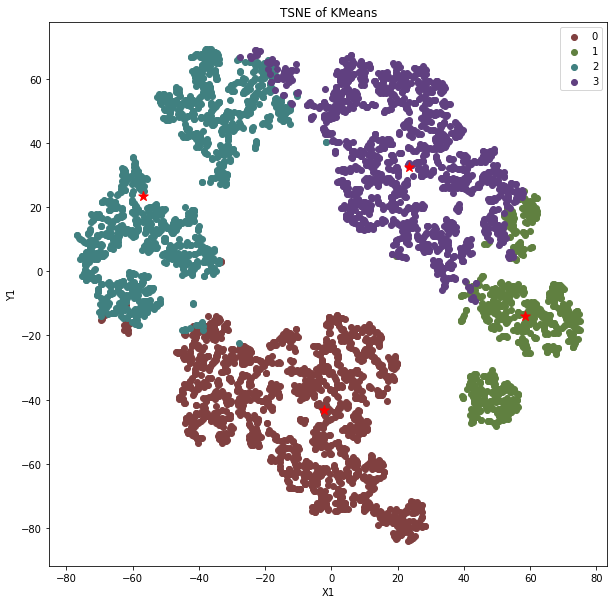

In [38]:
from sklearn.manifold import MDS, TSNE
import time
def scatter2D_labeled(X, Y, X_name, Y_name, labels, show_labels=None, title=None, legend=True, timeIt=False, alpha=0.1, clusterCenters=None, xC=None, yC=None, ymin=None, ymax=None, xmin=None, xmax=None, ax=None, some_text=None): 
    '''
    Inputs:
        X: 2D np array, shape (n,1), x coordinates
        Y: 2D np array, shape (n,1), y coordinates
        X_name: str, xlabel
        Y_name: str, ylabel
        labels: 2D np array, labels of data points
        show_labels: list of int, labels to show
        title: str, title
        legend: bool, show or don't show
        timeIt: bool, print elapsed time or not
        alpha: transparancy scatter plot
        clusterCenters: np arrays, result of clf.cluster_centers_ (not truncated on axis X and Y)
        xC: index of x of clusterCenters 
        yC: index of y of clusterCenters
        ymin, ymax, xmin, xmax: limits of the plot
        some_text: str, add text, example: score of clustering..
    Outputs:
        None, only a plot.
    Description:
        Plots in a 2D space, where x and y are both features.
        The datapoints are colored according to a label.
    '''
    start = time.time()
    # colors = # generate as many colors as labels.
    N = len(set(labels))
    HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
    colors = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)
    
    if type(X) == list or type(Y) == list or type(labels) == list:
        print("X, Y and labels must be numpy arrays !!")
        return None
        
    plot=False
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,10))
        plot=True
    ax.set_xlabel(X_name)
    ax.set_ylabel(Y_name)
    if ymin != None or ymax !=None:
        if ymin==None:
            ax.set_ylim(ymax=ymax)
        elif ymax == None:
            ax.set_ylim(ymin=ymin)
        else:
            ax.set_ylim(ymin=ymin, ymax=ymax)
            
    if xmin != None or xmax !=None:
        if xmin==None:
            ax.set_xlim(xmax=xmax)
        elif xmax == None:
            ax.set_xlim(xmin=xmin)
        else:
            ax.set_xlim(xmin=xmin, xmax=xmax)
            
    if title!=None:
        ax.set_title(title)
    
    if show_labels == None:
        for color, label in zip(colors, np.unique(labels)):
            ax.scatter(X[labels == label], Y[labels == label], color=color, alpha=alpha, label=label)
    else:
        for color, label in zip(colors, np.unique(labels)):
            if label in show_labels:
                ax.scatter(X[labels == label], Y[labels == label], color=color, alpha=alpha, label=label)
        clusterCenters = clusterCenters[show_labels, :]
                
    if legend:
        ax.legend()
    if some_text!=None:
        ax.text(0.1, 0.9, some_text, size=15, horizontalalignment='right')
    if type(clusterCenters) != type(None):
        x_centers = clusterCenters[:,xC]
        y_centers = clusterCenters[:,yC]
        ax.scatter(x_centers, y_centers, marker="*", s=400, c='r')
    if plot:
        plt.show()
    else:
        return ax
    if timeIt:
        print(time.time() - start)
def tsne(X, clf, sample_size=0.2):
    '''
    Inputs:
        X: 2D np array, scaled
        clf: clustering algorithm fit on X
        sample_size: float 0 to 1; fraction of X
    Output:
    plots t-sne with labels from clusters
    '''
    idx = np.random.randint(X.shape[0], size=int(sample_size*X.shape[0]))
    if idx.size > 10000:
        print('Careful, t-sne is expensive')
    X_sampled = X[idx, :]
    X_sampled = np.concatenate((X_sampled, clf.cluster_centers_), axis=0)
    labels = clf.labels_[idx]
    embedding = TSNE(n_components=2)
    X_mds = embedding.fit_transform(X_sampled)
    X_mds.shape
    n_clusters = len(clf.cluster_centers_)
    fig, ax = plt.subplots(figsize=(10,10))
    scatter2D_labeled(X_mds[:-n_clusters,0], X_mds[:-n_clusters,1], 'X1', 'Y1', labels, show_labels=None, title='TSNE of KMeans', legend=True, timeIt=False, alpha=1, clusterCenters=None, xC=None, yC=None, ymin=None, ymax=None, xmin=None, xmax=None, ax=ax)
    ax.scatter(X_mds[[-i for i in range(1,n_clusters+1)], 0], X_mds[[-i for i in range(1,n_clusters+1)], 1], marker='*', color='r', s=100)
    plt.show()
tsne(X, algo, sample_size=0.1)